# First results

This notebook is a first look at the CM26 data. It can serve as a starting point for others to access the data.
To get your token json file, contact me on keybase!

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import json
import gcsfs
from dask.diagnostics import ProgressBar

# 👇 replace with your key 
with open('/home/jovyan/keys/pangeo-forge-ocean-transport-4967-347e2048c5a1.json') as token_file:
    token = json.load(token_file)
fs = gcsfs.GCSFileSystem(token=token)
subfolder_full = 'ocean-transport-group/scale-aware-air-sea/outputs/temp/'
subfolder_final = 'ocean-transport-group/scale-aware-air-sea/outputs/'

## List available zarr stores

In [10]:
fs.ls(subfolder_final)

['ocean-transport-group/scale-aware-air-sea/outputs/CM26_final_output.zarr',
 'ocean-transport-group/scale-aware-air-sea/outputs/CM26_final_output_full_time.zarr',
 'ocean-transport-group/scale-aware-air-sea/outputs/CM26_final_output_full_time_ecmwf.zarr',
 'ocean-transport-group/scale-aware-air-sea/outputs/CM26_final_output_full_time_ncar.zarr',
 'ocean-transport-group/scale-aware-air-sea/outputs/temp']

In [52]:
def load_cm26_store(path):
    mapper = fs.get_mapper(path)
    ds = xr.open_dataset(mapper, engine='zarr', consolidated=True, use_cftime=True, chunks='auto')
    # for now discard the polar regions
    ds = ds.sel(yt_ocean=slice(-60, 60))
    return ds

# algos = ['ecmwf', 'ncar']
algos = ['ecmwf']
datasets = [load_cm26_store(f'{subfolder_final}CM26_final_output_full_time_{algo}.zarr').assign_coords({'algo':algo}) for algo in algos]
ds_plot = xr.concat(datasets, dim='algo')
ds_plot

<xarray.Dataset>
Dimensions:           (yt_ocean: 75, xt_ocean: 180, algo: 1, time: 7305)
Coordinates: (12/13)
    area              (yt_ocean, xt_ocean) float32 dask.array<chunksize=(75, 180), meta=np.ndarray>
    area_t            (yt_ocean, xt_ocean) float32 dask.array<chunksize=(75, 180), meta=np.ndarray>
    dxt               (yt_ocean, xt_ocean) float64 dask.array<chunksize=(75, 180), meta=np.ndarray>
    dyt               (yt_ocean, xt_ocean) float64 dask.array<chunksize=(75, 180), meta=np.ndarray>
    geolat_t          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(75, 180), meta=np.ndarray>
    geolon_t          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(75, 180), meta=np.ndarray>
    ...                ...
    kmt               (yt_ocean, xt_ocean) float32 dask.array<chunksize=(75, 180), meta=np.ndarray>
  * time              (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
    wet               (yt_ocean, xt_ocean) float64 dask.array<chunksize=(75, 180), meta=np.ndarray>
  * xt_ocean          (xt_ocean) float64 -279.0 -277.0 -275.0 ... 75.0 77.0 79.0
  * yt_ocean          (yt_ocean) float64 -59.01 -57.96 -56.88 ... 58.49 59.52
  * algo              (algo) <U5 'ecmwf'
Data variables: (12/16)
    evap              (algo, xt_ocean, yt_ocean, time) float32 dask.array<chunksize=(1, 180, 75, 1380), meta=np.ndarray>
    evap_large_scale  (algo, xt_ocean, yt_ocean, time) float32 dask.array<chunksize=(1, 180, 75, 1380), meta=np.ndarray>
    q_ref             (algo, xt_ocean, yt_ocean, time) float32 dask.array<chunksize=(1, 180, 75, 1380), meta=np.ndarray>
    qh                (algo, xt_ocean, yt_ocean, time) float32 dask.array<chunksize=(1, 180, 75, 1380), meta=np.ndarray>
    qh_large_scale    (algo, xt_ocean, yt_ocean, time) float32 dask.array<chunksize=(1, 180, 75, 1380), meta=np.ndarray>
    ql                (algo, xt_ocean, yt_ocean, time) float32 dask.array<chunksize=(1, 180, 75, 1380), meta=np.ndarray>
    ...                ...
    taux              (algo, xt_ocean, yt_ocean, time) float32 dask.array<chunksize=(1, 180, 75, 1380), meta=np.ndarray>
    taux_large_scale  (algo, xt_ocean, yt_ocean, time) float32 dask.array<chunksize=(1, 180, 75, 1380), meta=np.ndarray>
    tauy              (algo, xt_ocean, yt_ocean, time) float32 dask.array<chunksize=(1, 180, 75, 1380), meta=np.ndarray>
    tauy_large_scale  (algo, xt_ocean, yt_ocean, time) float32 dask.array<chunksize=(1, 180, 75, 1380), meta=np.ndarray>
    u_ref             (algo, xt_ocean, yt_ocean, time) float32 dask.array<chunksize=(1, 180, 75, 1380), meta=np.ndarray>
    v_ref             (algo, xt_ocean, yt_ocean, time) float32 dask.array<chunksize=(1, 180, 75, 1380), meta=np.ndarray>
Attributes:
    algo:     ecmwf

In [49]:
algos = ['ecmwf', 'ncar']
datasets = [load_cm26_store(f'{subfolder_final}CM26_final_output_full_time_{algo}.zarr').assign_coords({'algo':algo}).isel(time=slice(0,2)).load() for algo in algos]
ds_plot = xr.concat(datasets, dim='algo')
ds_plot

<xarray.Dataset>
Dimensions:           (yt_ocean: 75, xt_ocean: 180, algo: 2, time: 2)
Coordinates: (12/13)
    area              (yt_ocean, xt_ocean) float32 1.312e+10 1.312e+10 ... 0.0
    area_t            (yt_ocean, xt_ocean) float32 3.279e+07 3.279e+07 ... 0.0
    dxt               (yt_ocean, xt_ocean) float64 5.726e+03 ... 5.641e+03
    dyt               (yt_ocean, xt_ocean) float64 5.726e+03 ... 5.641e+03
    geolat_t          (yt_ocean, xt_ocean) float32 -59.01 -59.01 ... 0.0 0.0
    geolon_t          (yt_ocean, xt_ocean) float32 -279.0 -277.0 ... 0.0 0.0
    ...                ...
    kmt               (yt_ocean, xt_ocean) float32 32.04 32.82 42.07 ... 0.0 0.0
  * time              (time) object 0181-01-01 12:00:00 0181-01-02 12:00:00
    wet               (yt_ocean, xt_ocean) float64 1.0 1.0 1.0 ... 0.0 0.0 0.0
  * xt_ocean          (xt_ocean) float64 -279.0 -277.0 -275.0 ... 75.0 77.0 79.0
  * yt_ocean          (yt_ocean) float64 -59.01 -57.96 -56.88 ... 58.49 59.52
  * algo              (algo) <U5 'ecmwf' 'ncar'
Data variables: (12/16)
    evap              (algo, xt_ocean, yt_ocean, time) float32 -1.692e-07 ......
    evap_large_scale  (algo, xt_ocean, yt_ocean, time) float32 -1.346e-07 ......
    q_ref             (algo, xt_ocean, yt_ocean, time) float32 0.004232 ... nan
    qh                (algo, xt_ocean, yt_ocean, time) float32 0.2608 ... nan
    qh_large_scale    (algo, xt_ocean, yt_ocean, time) float32 0.2766 ... nan
    ql                (algo, xt_ocean, yt_ocean, time) float32 -0.4224 ... nan
    ...                ...
    taux              (algo, xt_ocean, yt_ocean, time) float32 0.001064 ... nan
    taux_large_scale  (algo, xt_ocean, yt_ocean, time) float32 0.000857 ... nan
    tauy              (algo, xt_ocean, yt_ocean, time) float32 0.0003185 ... nan
    tauy_large_scale  (algo, xt_ocean, yt_ocean, time) float32 0.0002081 ... nan
    u_ref             (algo, xt_ocean, yt_ocean, time) float32 1.174 ... nan
    v_ref             (algo, xt_ocean, yt_ocean, time) float32 0.2851 ... nan
Attributes:
    algo:     ecmwf

In [50]:
datasets[0].qh.isel(time=slice(0,2)).load()

<xarray.DataArray 'qh' (xt_ocean: 180, yt_ocean: 75, time: 2)>
array([[[  0.26084244, -11.728223  ],
        [ -0.45465663, -13.464278  ],
        [ -1.2482547 , -11.838669  ],
        ...,
        [         nan,          nan],
        [         nan,          nan],
        [         nan,          nan]],

       [[ -0.24399172, -11.915918  ],
        [ -2.7683196 , -15.583258  ],
        [ -4.449464  , -12.052476  ],
        ...,
        [         nan,          nan],
        [         nan,          nan],
        [         nan,          nan]],

       [[ -0.09225275, -11.695071  ],
        [ -1.3194401 , -21.261278  ],
        [ -3.536363  , -19.911795  ],
        ...,
...
        ...,
        [         nan,          nan],
        [         nan,          nan],
        [         nan,          nan]],

       [[ -1.5249577 , -13.796845  ],
        [ -0.37152973, -10.679437  ],
        [  0.16955522,  -9.78636   ],
        ...,
        [         nan,          nan],
        [         nan,          nan],
        [         nan,          nan]],

       [[ -0.5440173 , -15.059502  ],
        [ -0.05772662, -11.854819  ],
        [ -0.58137685, -12.11922   ],
        ...,
        [         nan,          nan],
        [         nan,          nan],
        [         nan,          nan]]], dtype=float32)
Coordinates: (12/13)
    area      (yt_ocean, xt_ocean) float32 1.312e+10 1.312e+10 ... 0.0 0.0
    area_t    (yt_ocean, xt_ocean) float32 3.279e+07 3.279e+07 ... 0.0 0.0
    dxt       (yt_ocean, xt_ocean) float64 5.726e+03 5.726e+03 ... 5.641e+03
    dyt       (yt_ocean, xt_ocean) float64 5.726e+03 5.726e+03 ... 5.641e+03
    geolat_t  (yt_ocean, xt_ocean) float32 -59.01 -59.01 -59.01 ... 0.0 0.0 0.0
    geolon_t  (yt_ocean, xt_ocean) float32 -279.0 -277.0 -275.0 ... 0.0 0.0 0.0
    ...        ...
    kmt       (yt_ocean, xt_ocean) float32 32.04 32.82 42.07 ... 0.0 0.0 0.0
  * time      (time) object 0181-01-01 12:00:00 0181-01-02 12:00:00
    wet       (yt_ocean, xt_ocean) float64 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0
  * xt_ocean  (xt_ocean) float64 -279.0 -277.0 -275.0 -273.0 ... 75.0 77.0 79.0
  * yt_ocean  (yt_ocean) float64 -59.01 -57.96 -56.88 ... 57.43 58.49 59.52
    algo      <U5 'ecmwf'

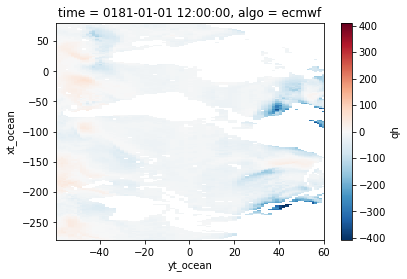

In [54]:
ds_plot.qh.isel(time=0).plot()

## Precompute some fields for plotting

**NOTE**
- Maybe write out larger chunks to make time averaging more efficient?

In [53]:
with ProgressBar():
    ds_mean = ds_plot.mean('time').load()

[                                        ] | 0% Completed |  3.6s


KeyboardInterrupt: 

In [15]:
with ProgressBar():
    ds_seasonal = ds_plot.groupby('time.season').mean('time').load()
ds_seasonal = ds_seasonal.sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'], dims=['season']))

[########################################] | 100% Completed | 13min 24.7s


In [50]:
def add_diff_dim(ds):
    # add difference
    diff = ds.diff('algo')
    diff = diff.squeeze().drop('algo').assign_coords(algo='diff')
    return xr.concat([ds, diff], dim='algo')

In [52]:
ds_mean = add_diff_dim(ds_mean)
ds_seasonal = add_diff_dim(ds_seasonal)

## Do the algos reproduce the same overall signal (YES!!!)

<Figure size 432x288 with 0 Axes>

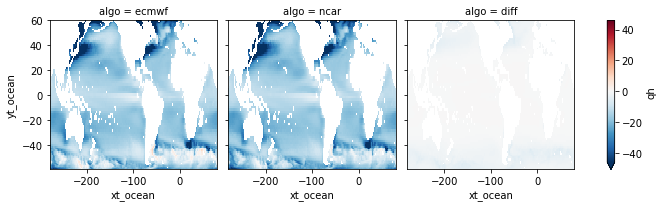

<Figure size 432x288 with 0 Axes>

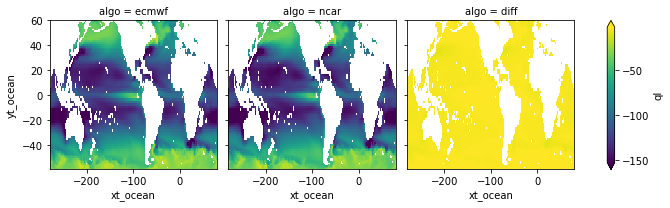

<Figure size 432x288 with 0 Axes>

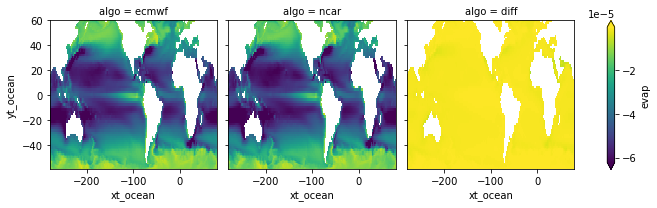

<Figure size 432x288 with 0 Axes>

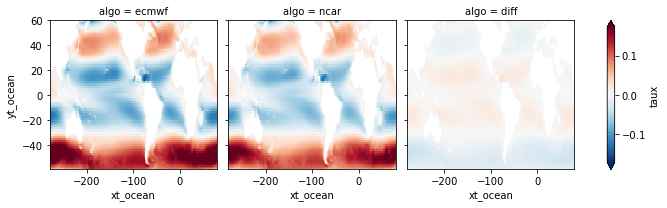

<Figure size 432x288 with 0 Axes>

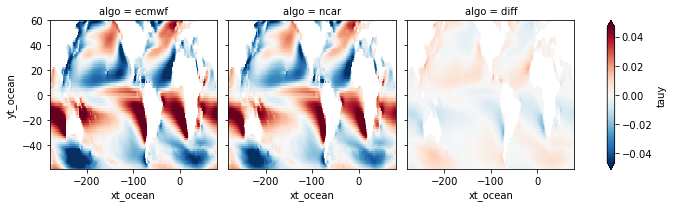

In [53]:
for var in ['qh', 'ql', 'evap', 'taux', 'tauy']:
    plt.figure()
    ds_mean[var].plot(col='algo', y='yt_ocean', robust=True)

<Figure size 432x288 with 0 Axes>

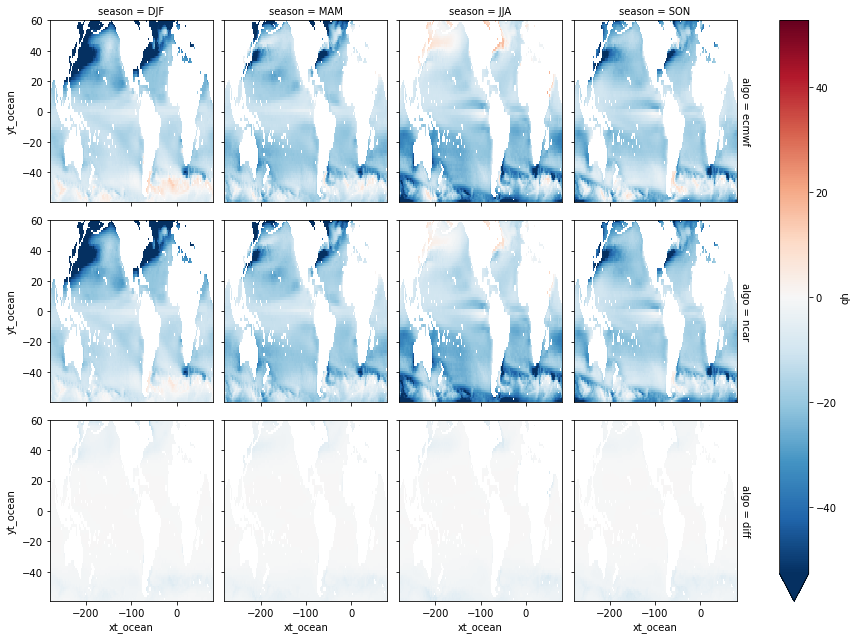

<Figure size 432x288 with 0 Axes>

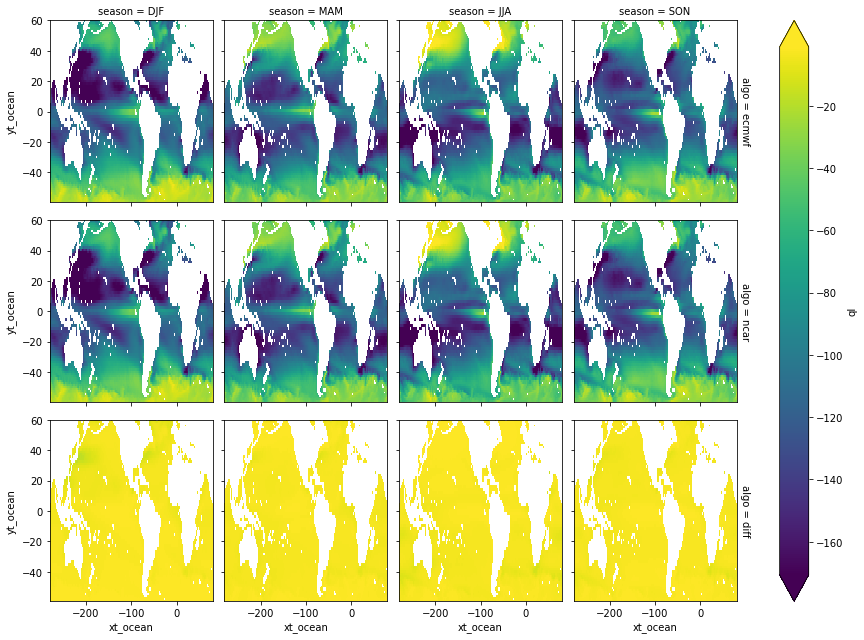

<Figure size 432x288 with 0 Axes>

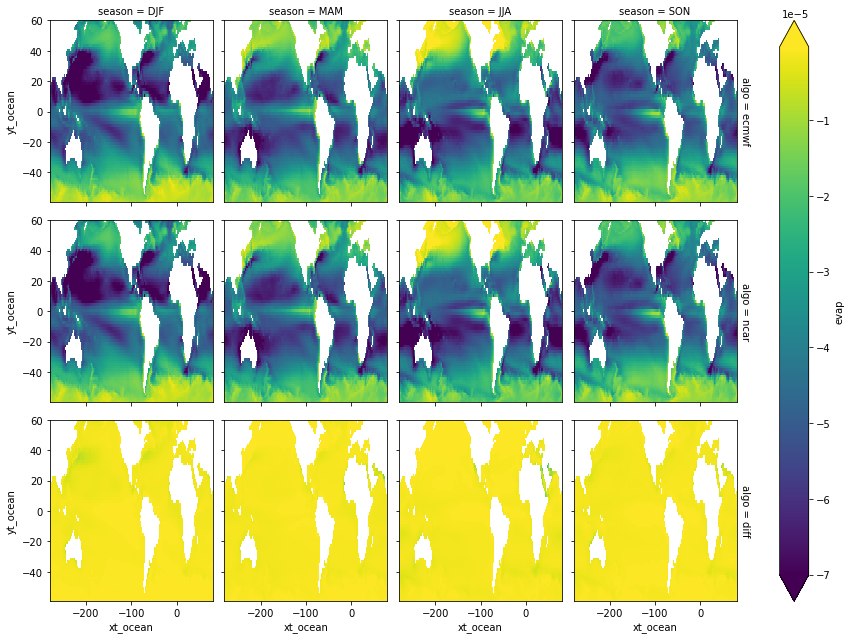

<Figure size 432x288 with 0 Axes>

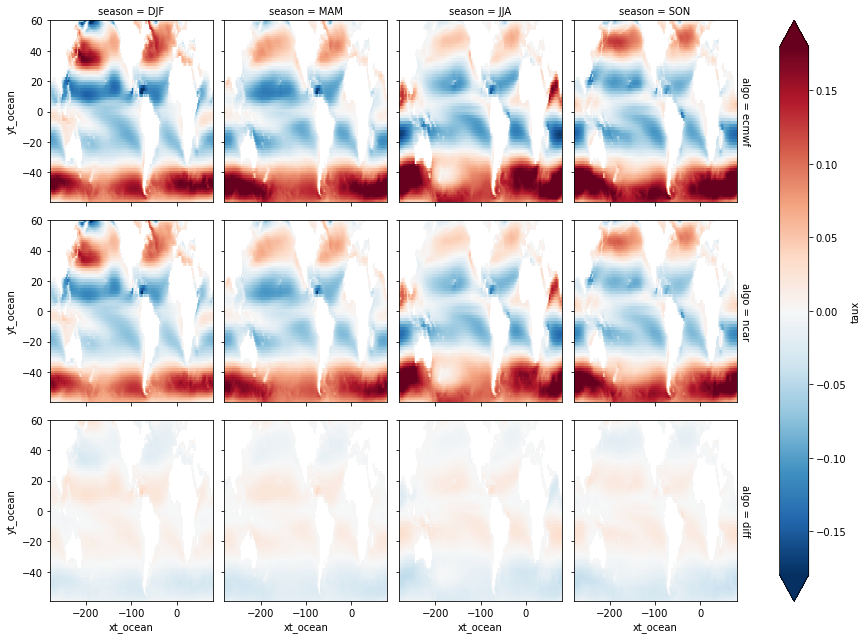

<Figure size 432x288 with 0 Axes>

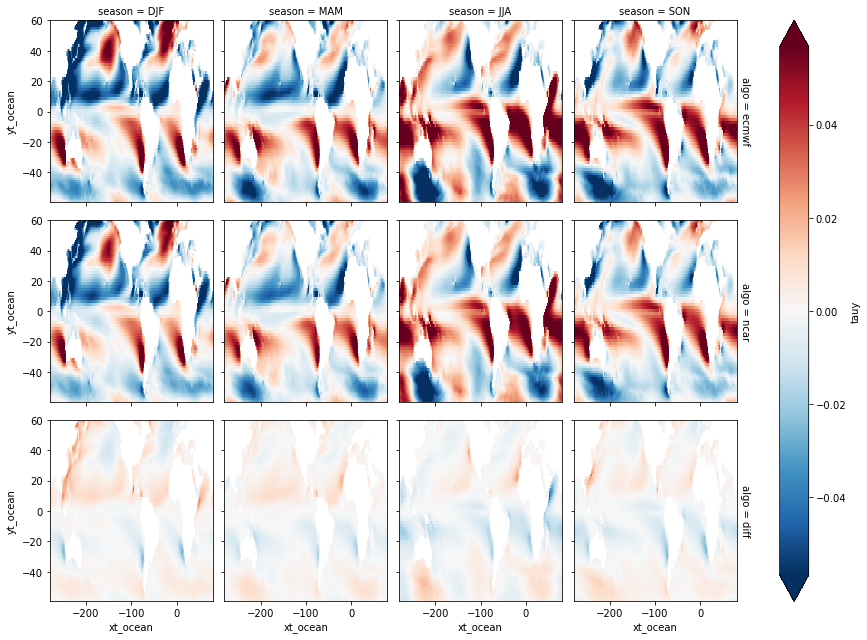

In [54]:
for var in ['qh', 'ql', 'evap', 'taux', 'tauy']:
    plt.figure()
    ds_seasonal[var].plot(col='season', row='algo', y='yt_ocean', robust=True)

## Now lets look at the large/small scale contributions

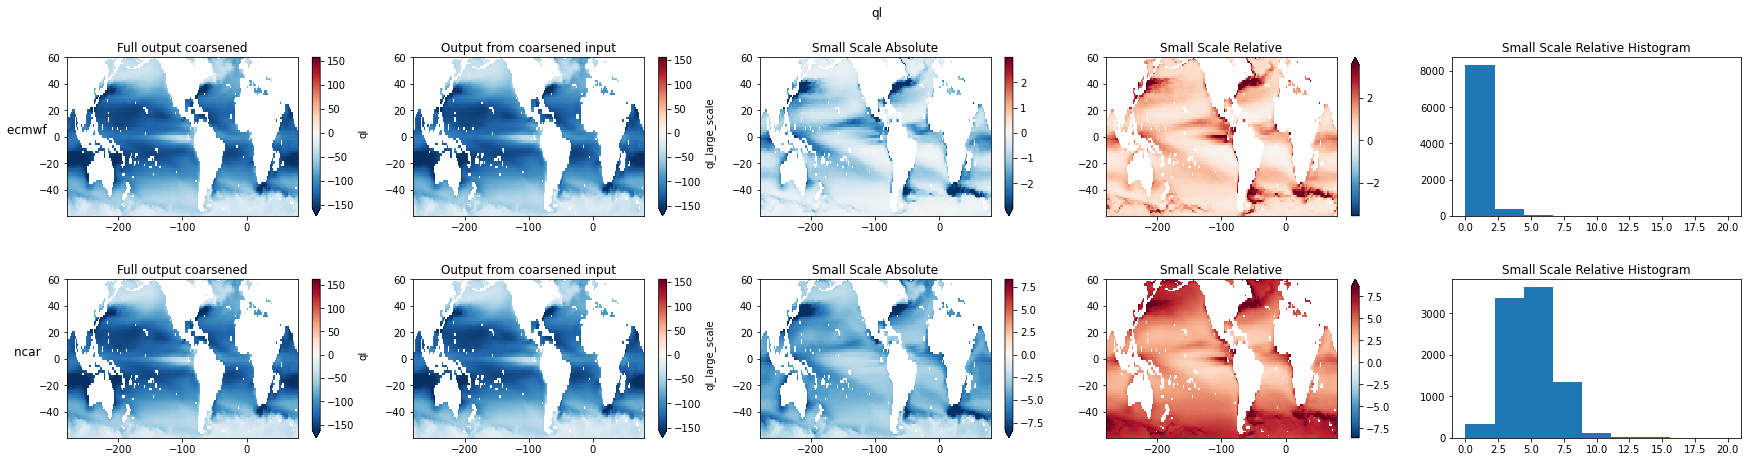

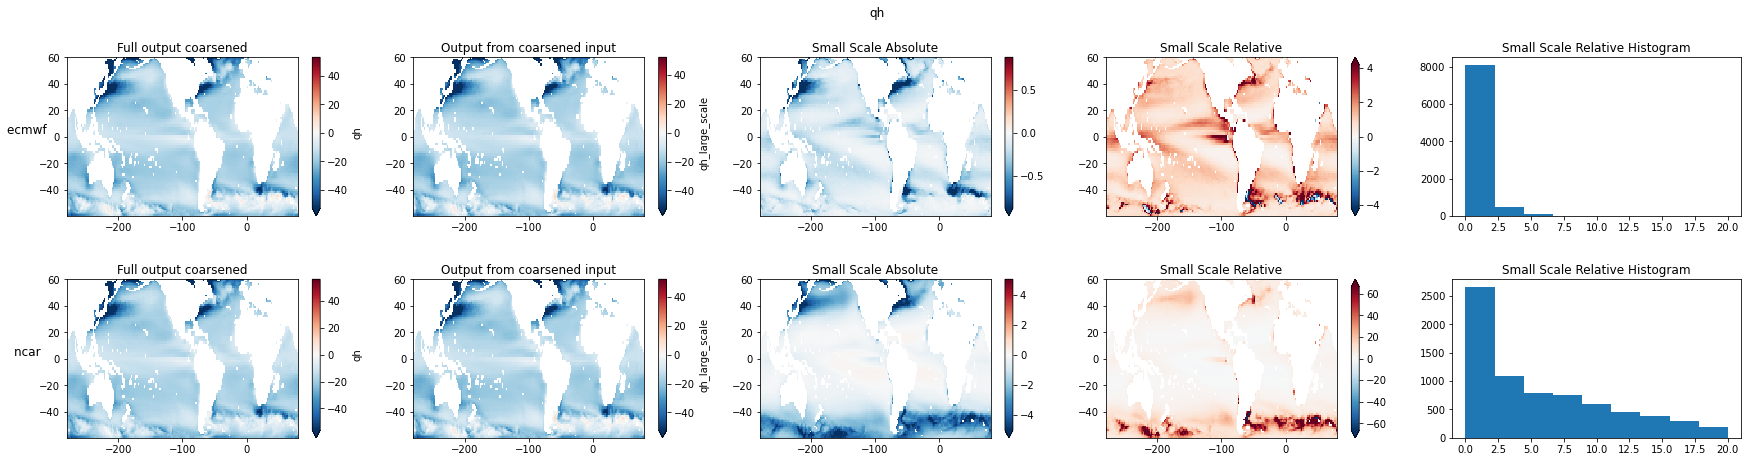

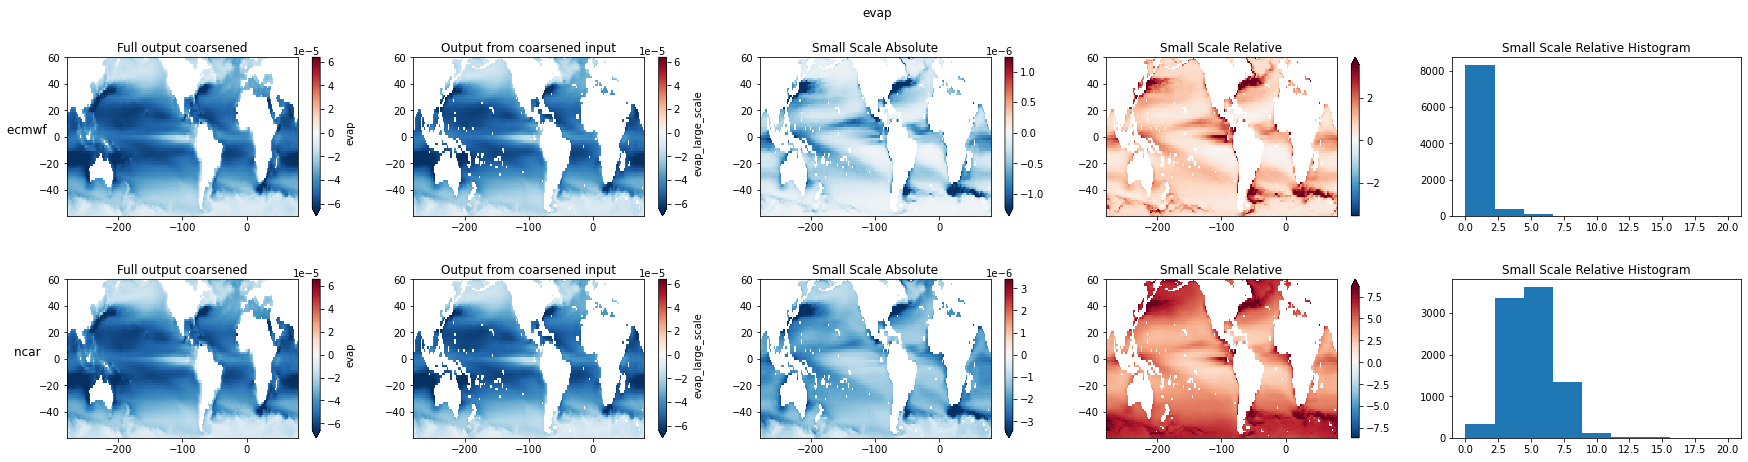

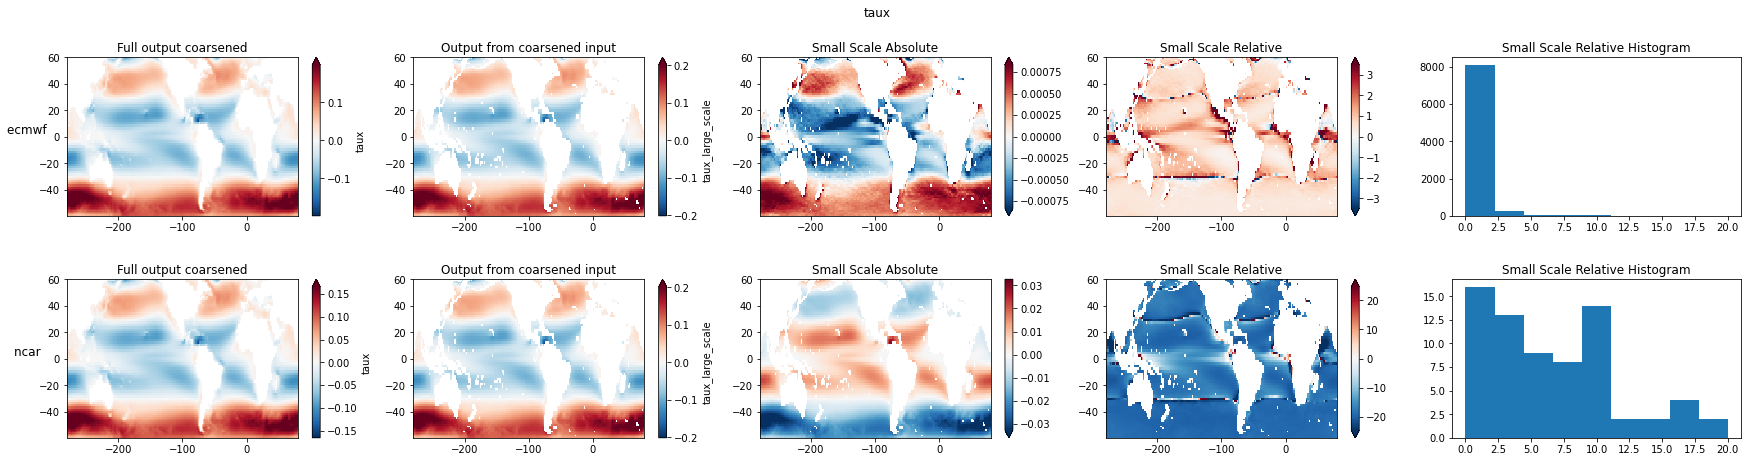

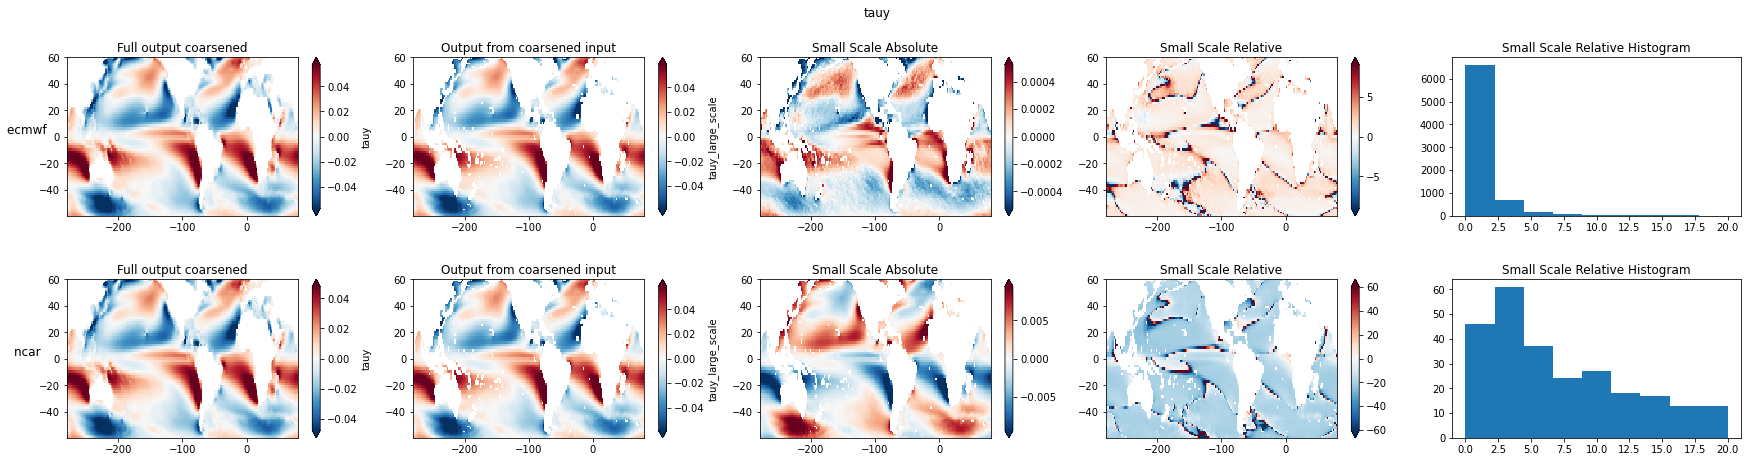

In [91]:
# not quite sure if we should look at the mean of the difference or the difference of the mean over time...
plot_kwargs = {'y':'yt_ocean', 'robust':True, 'center':0}
nx = 5
ny = len(algos)

for var in ['ql', 'qh', 'evap', 'taux', 'tauy']:
    fig, axarr = plt.subplots(ny, nx, figsize=[6*nx,3.5*ny])
    for ai,algo in enumerate(algos):
        ds_algo = ds_mean.sel(algo=algo)
        
        full = ds_algo[var]
        large_scale = ds_algo[var+'_large_scale']
        small_scale = full-large_scale
        small_scale_relative = (small_scale/full*100)
        
        # Full output
        ax = axarr[ai, 0]
        full.plot(ax=ax, **plot_kwargs)
        ax.set_title('Full output coarsened')
        
        # Large Scale Part
        ax = axarr[ai, 1]
        large_scale.plot(ax=ax, **plot_kwargs)
        ax.set_title('Output from coarsened input')
        
        # Small Scale Part
        ax = axarr[ai, 2]
        small_scale.plot(ax=ax, **plot_kwargs)
        ax.set_title('Small Scale Absolute')
        
        # Small scale relative to full
        ax = axarr[ai, 3]
        small_scale_relative.plot(ax=ax, **plot_kwargs)
        ax.set_title('Small Scale Relative')
        
        # Histogram of small scale relative
        ax = axarr[ai, 4]
        small_scale_relative.plot.hist(ax=ax,bins=np.linspace(0,20,10))
        ax.set_title('Small Scale Relative Histogram')

        # remove all x/y labels
        for ax in axarr.flat:
            ax.set_xlabel('')

        for ax in axarr[:,1:].flat:
            ax.set_ylabel('')

        # exploit left ylabels for algo annotation
        axarr[ai,0].set_ylabel(f"{algo}    ",rotation=0, size='large')
        
    fig.subplots_adjust(hspace=0.4)
    fig.suptitle(var)

## Looking at the seasonal cycle with xarray interactive

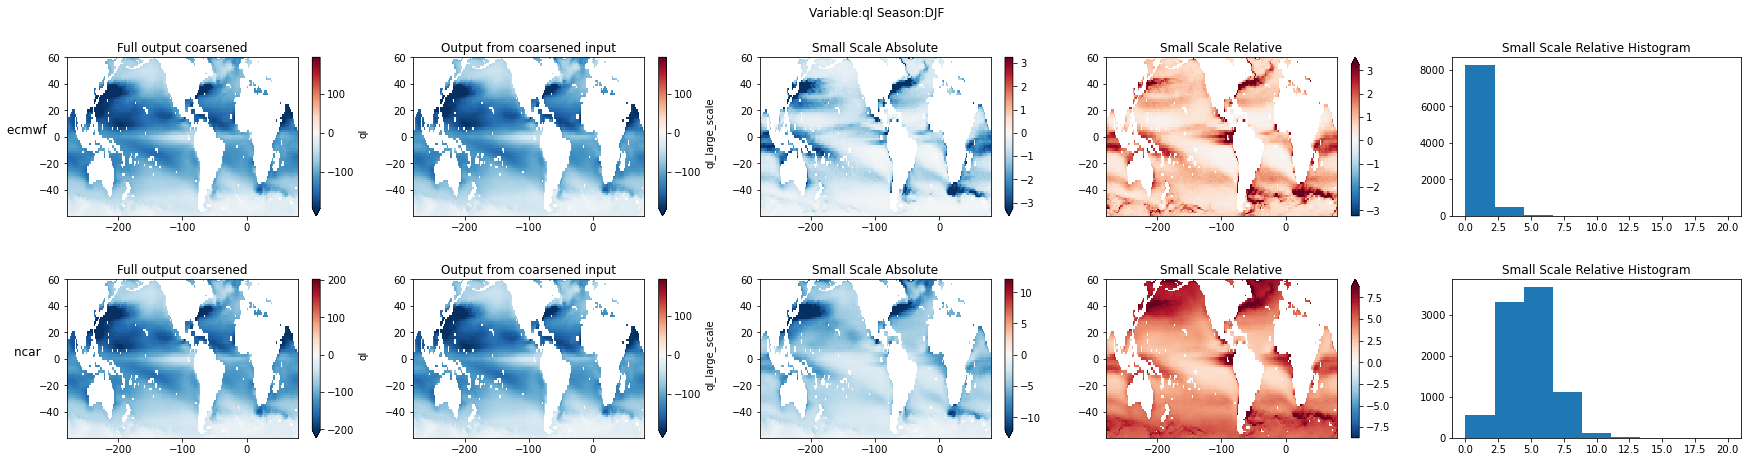

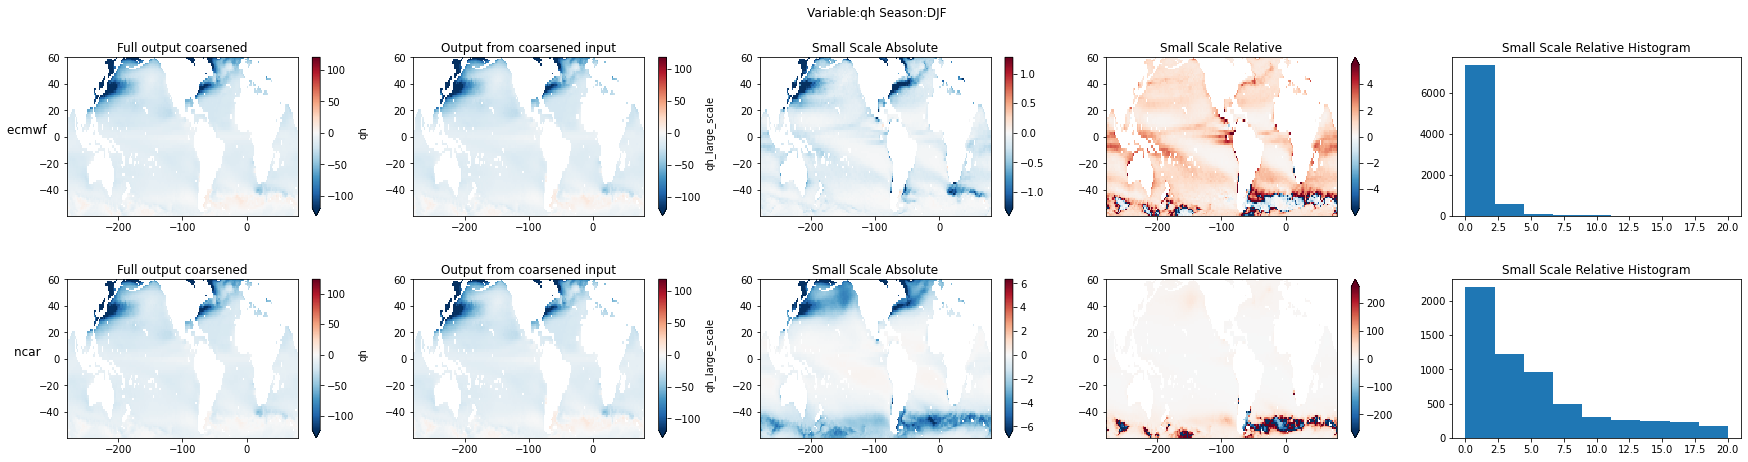

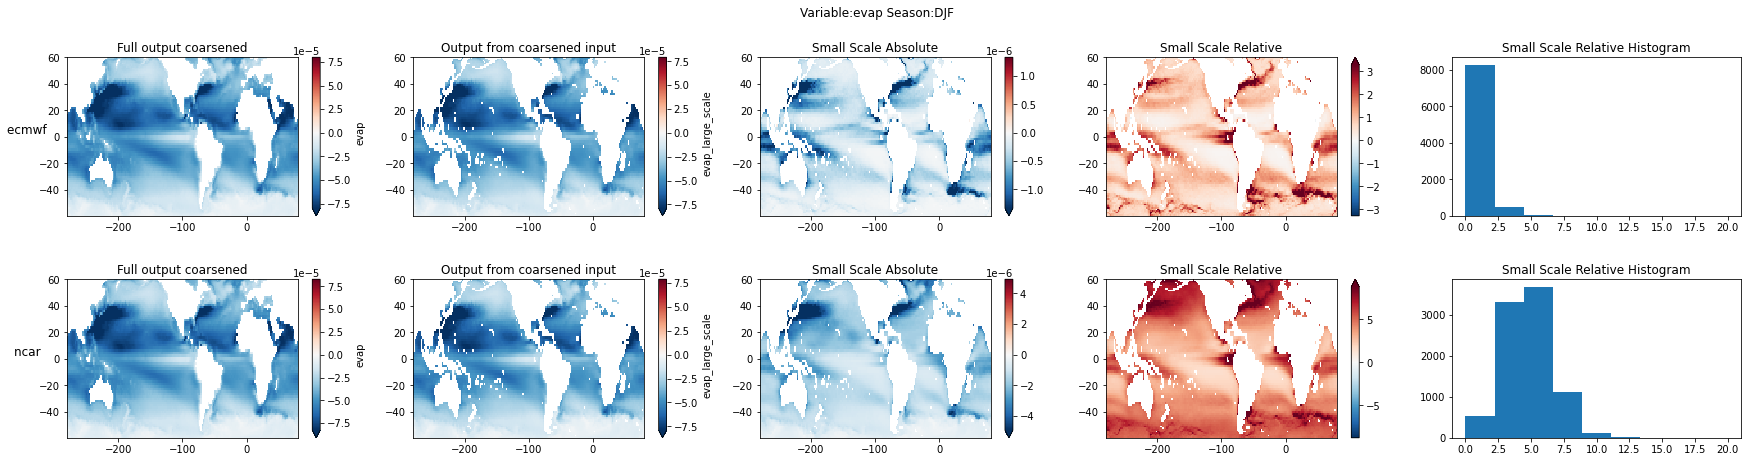

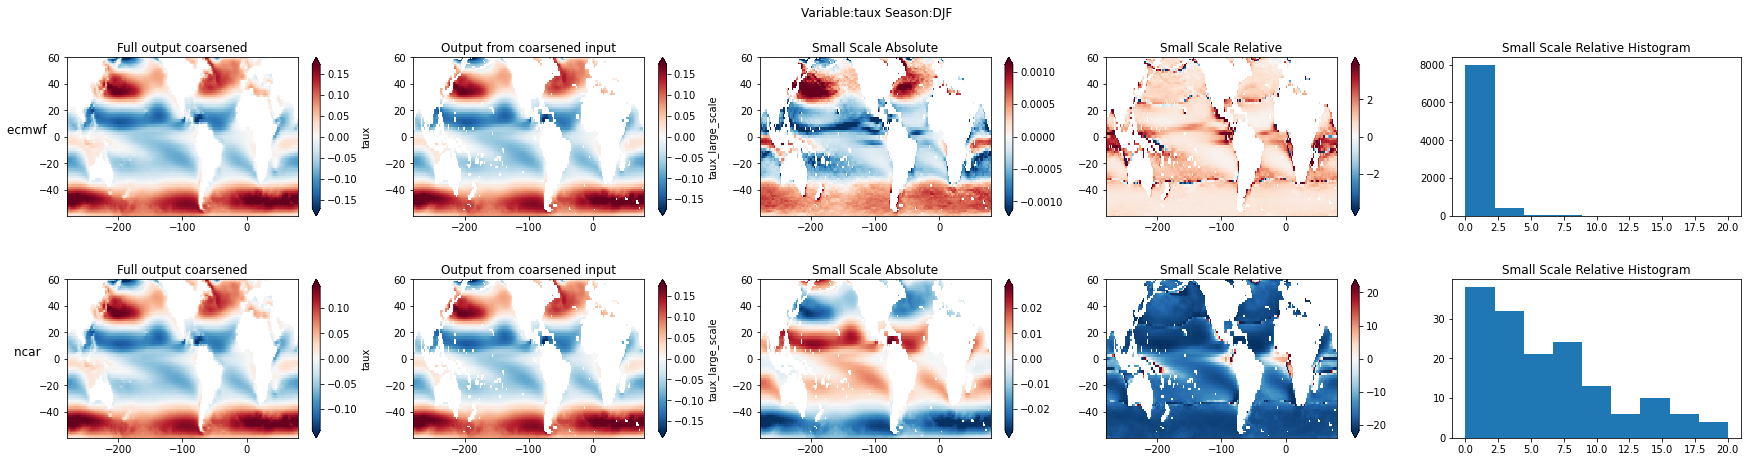

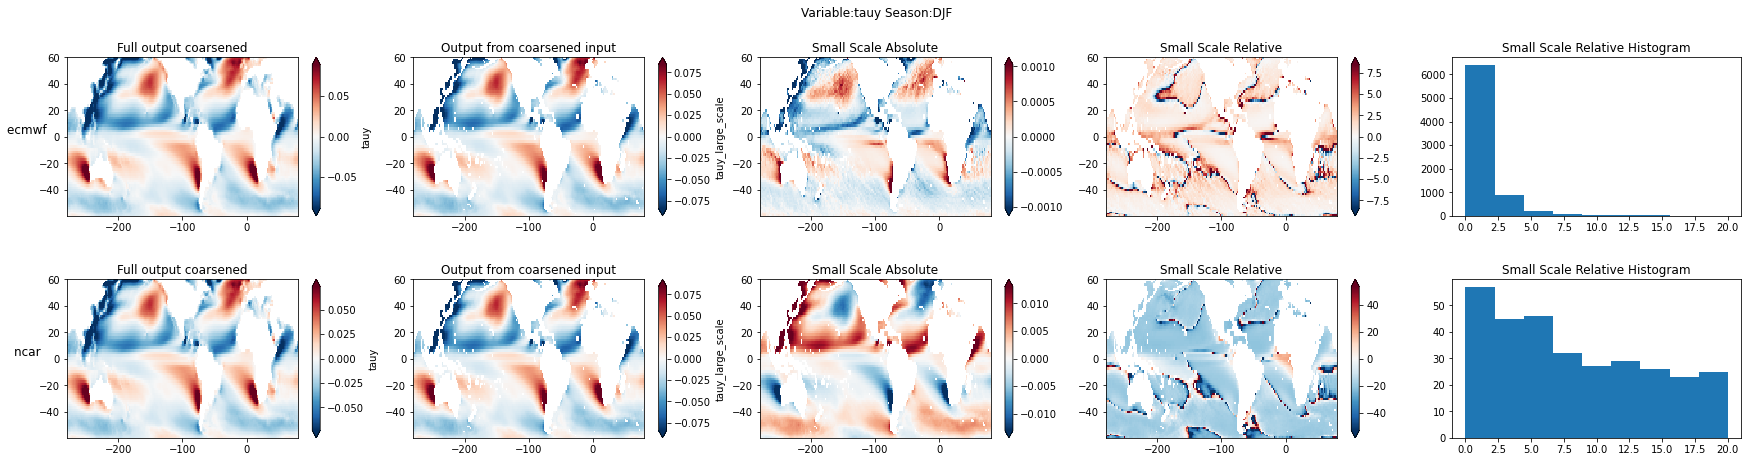

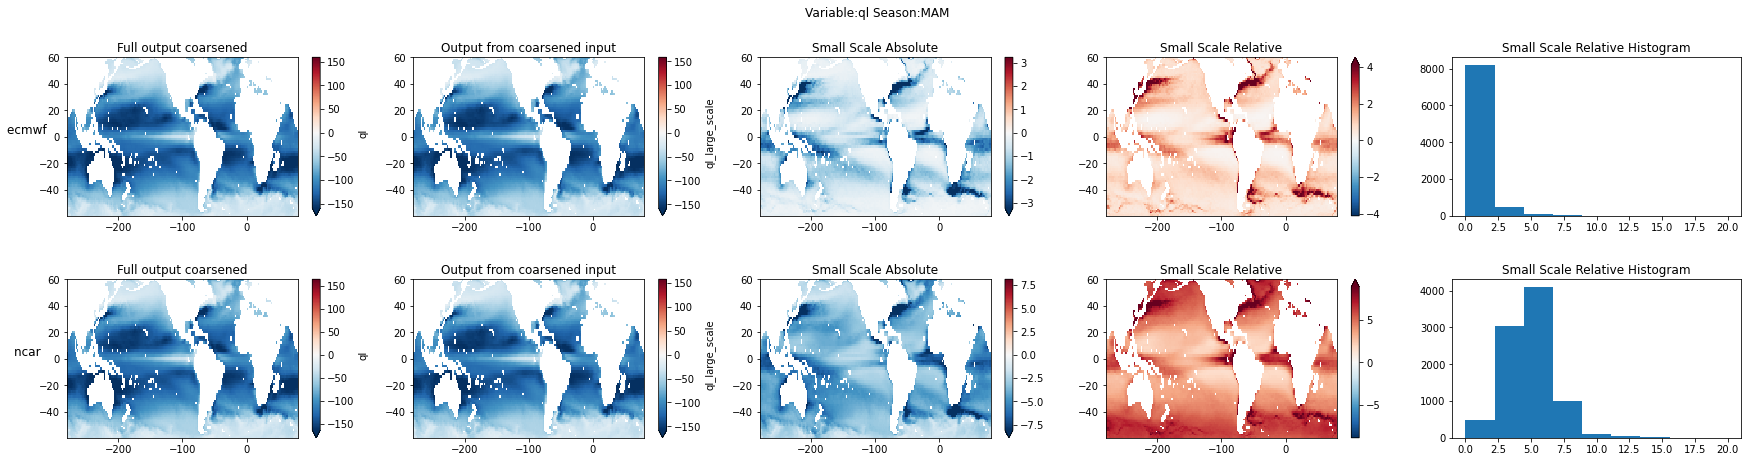

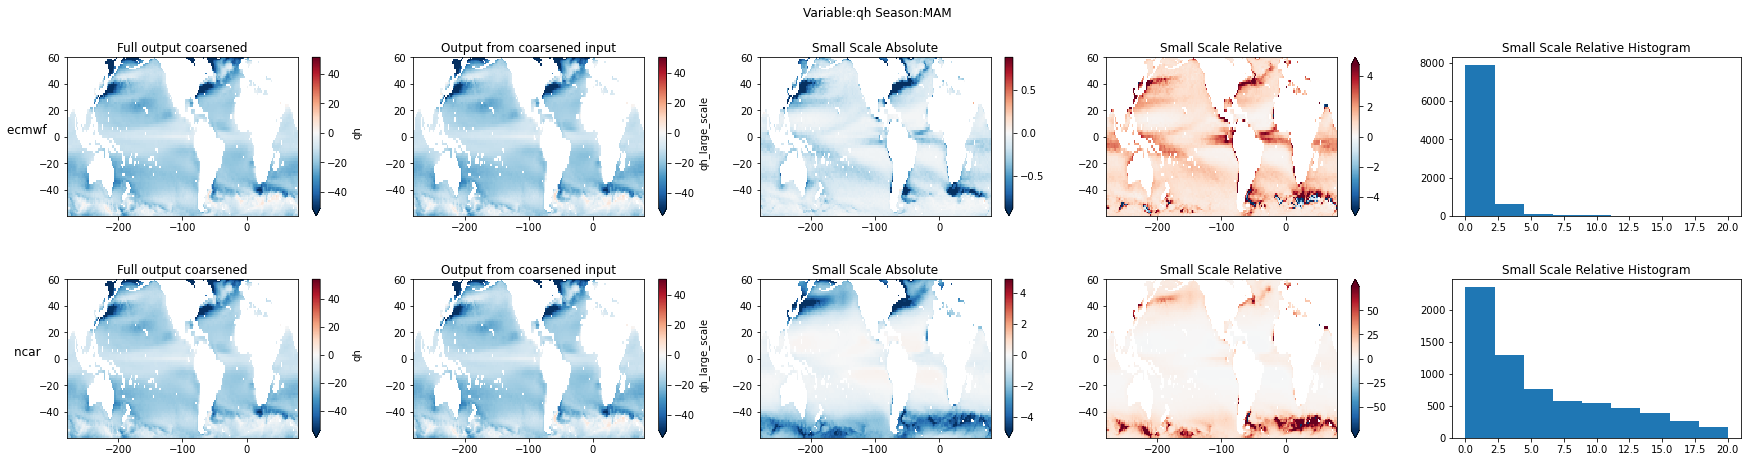

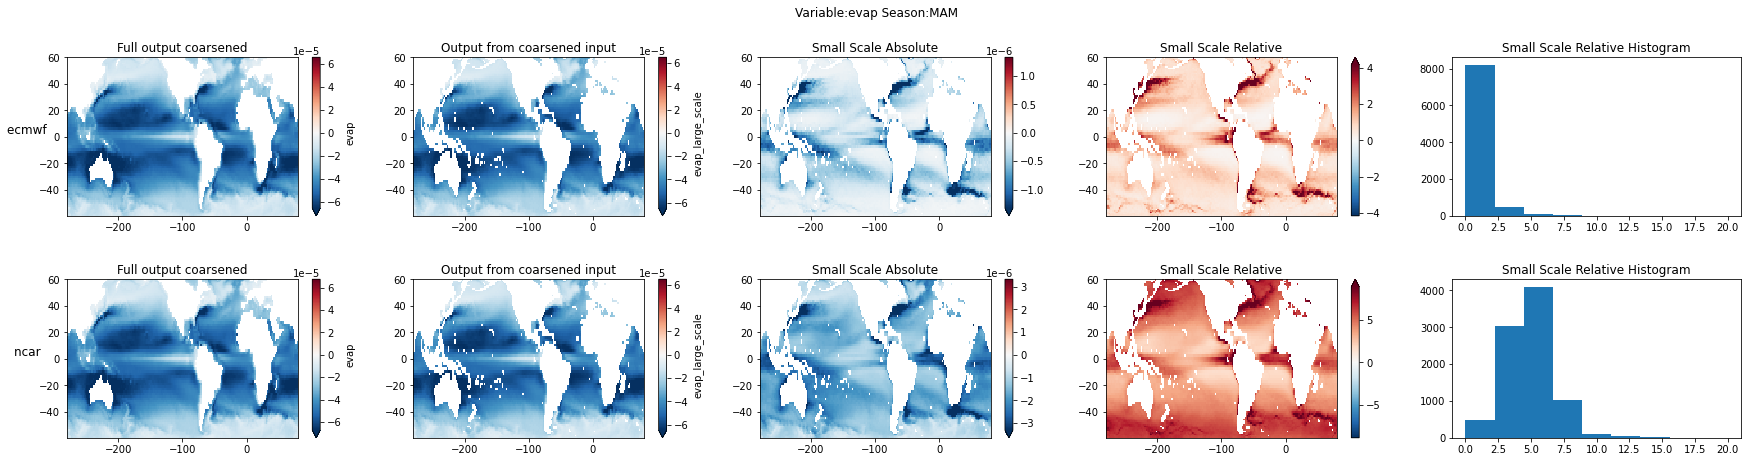

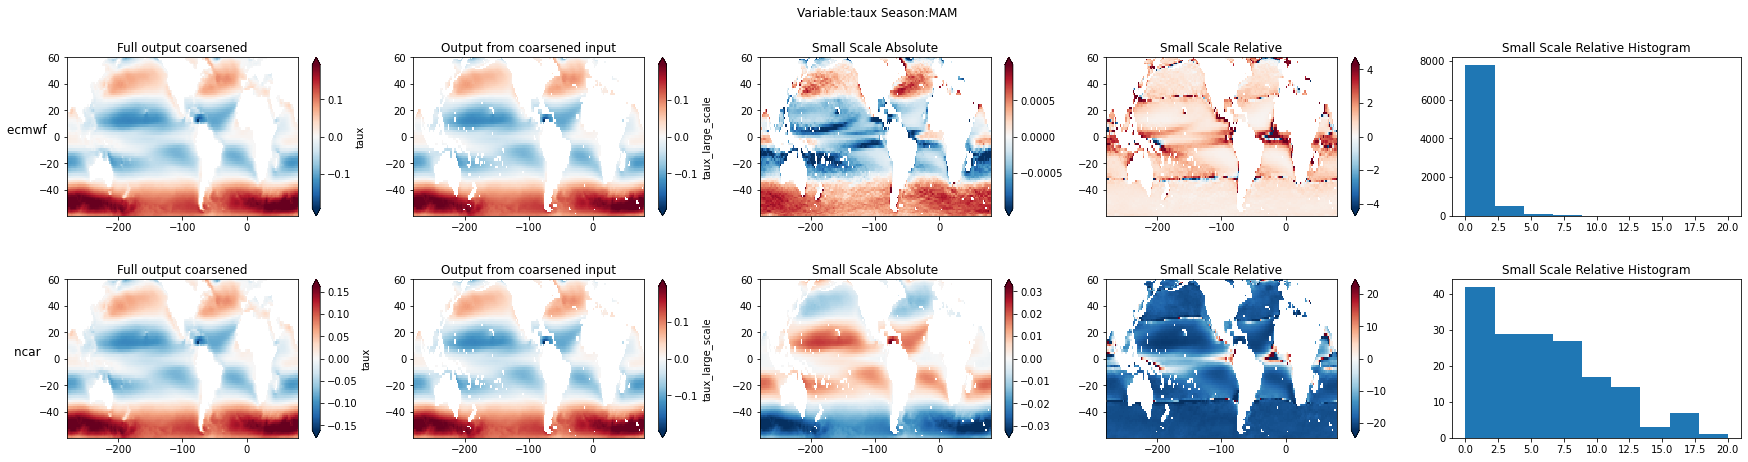

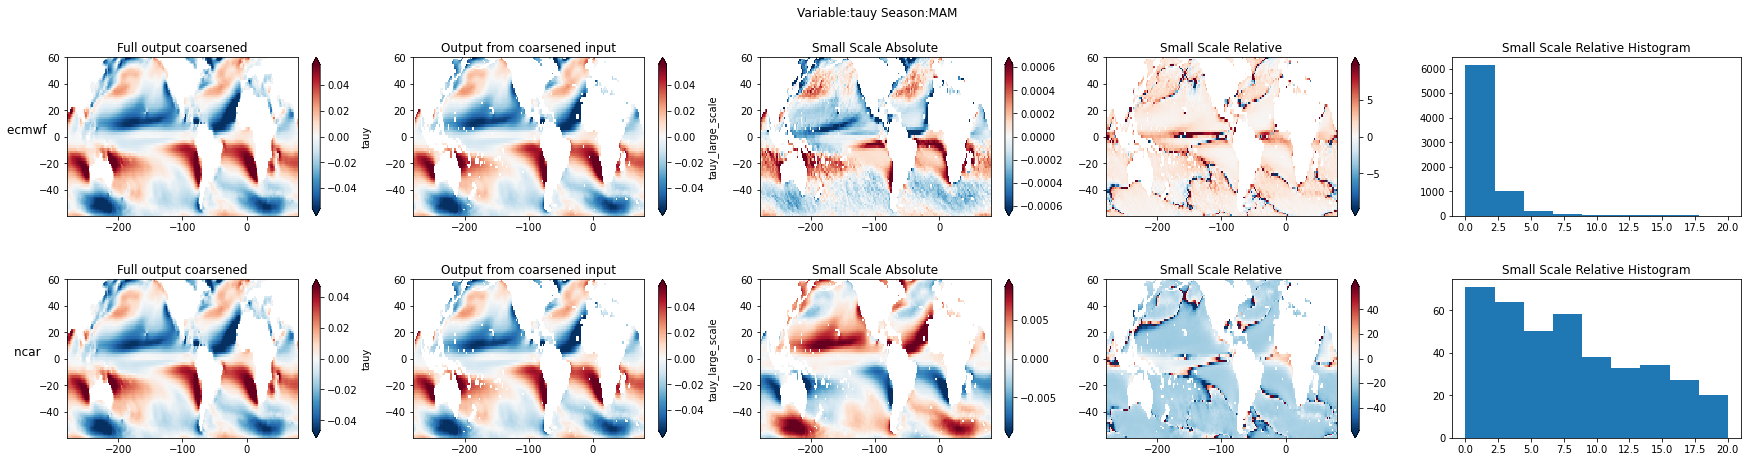

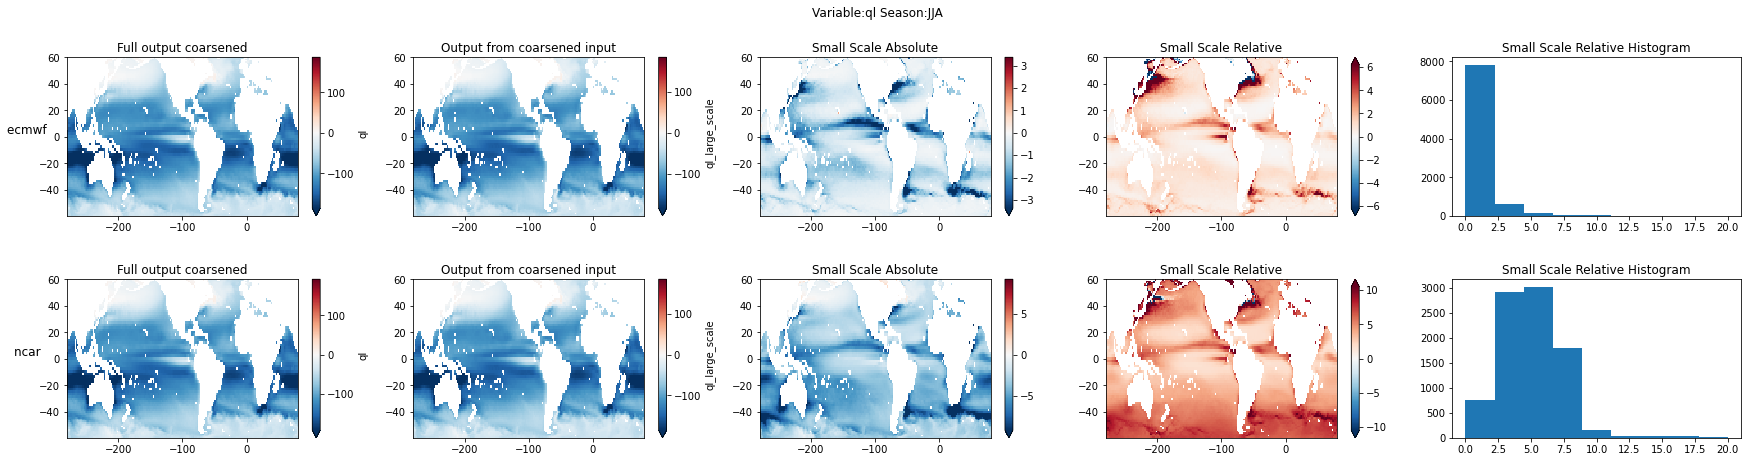

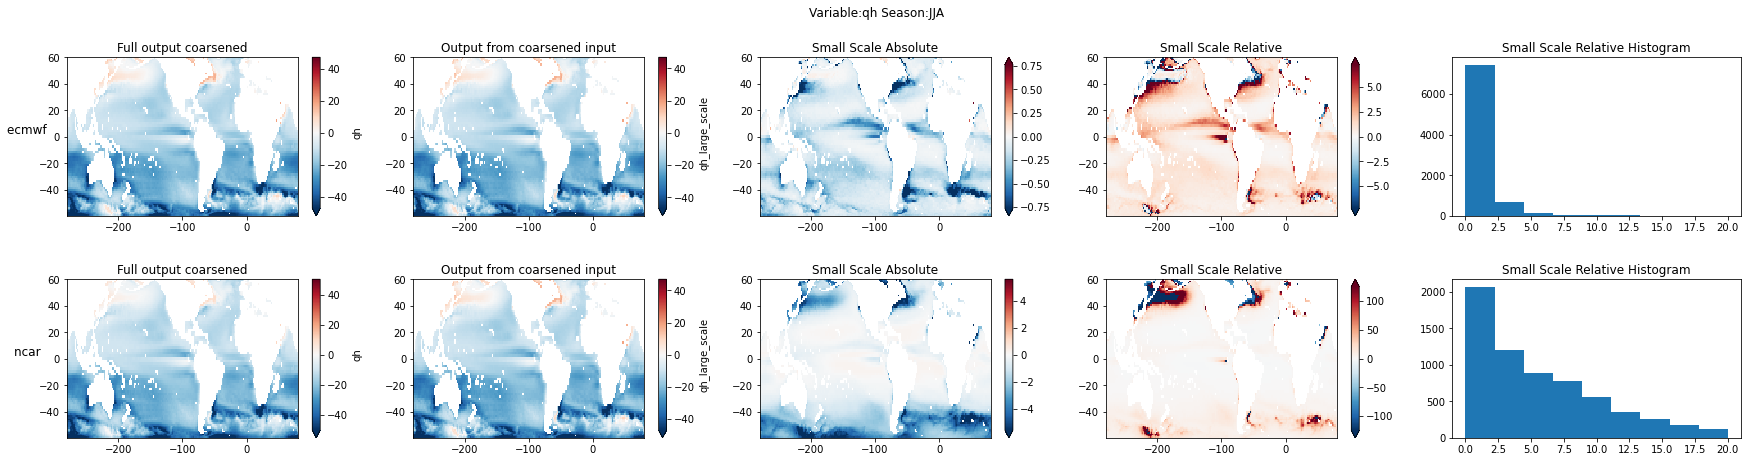

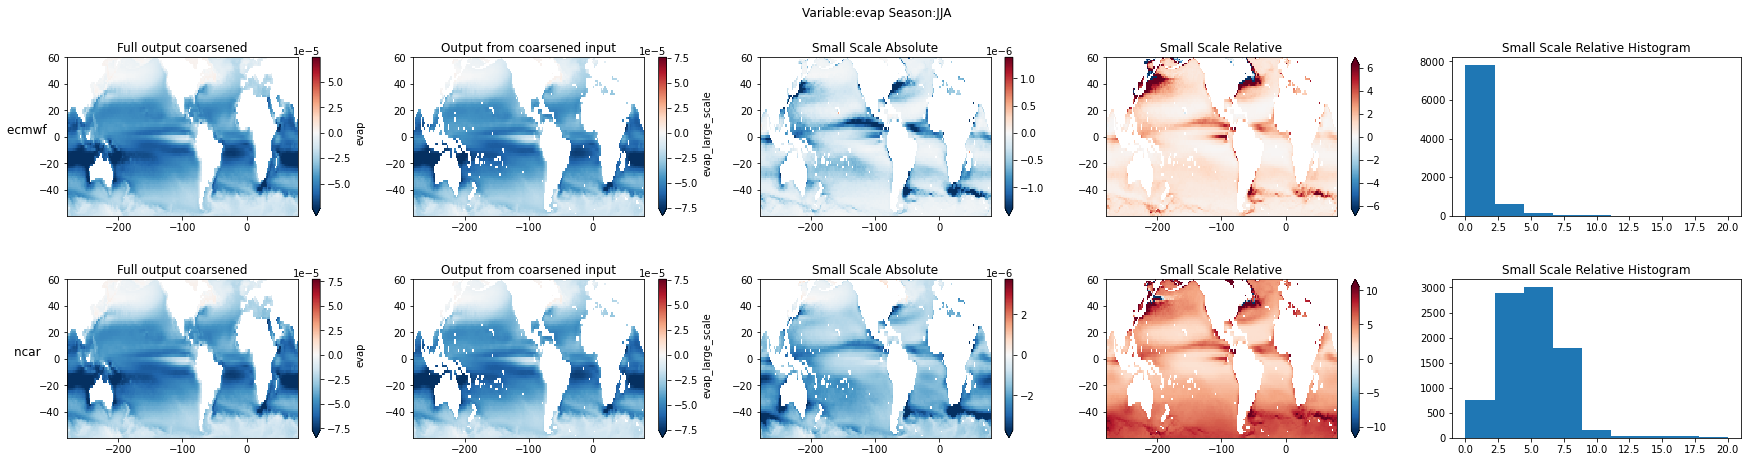

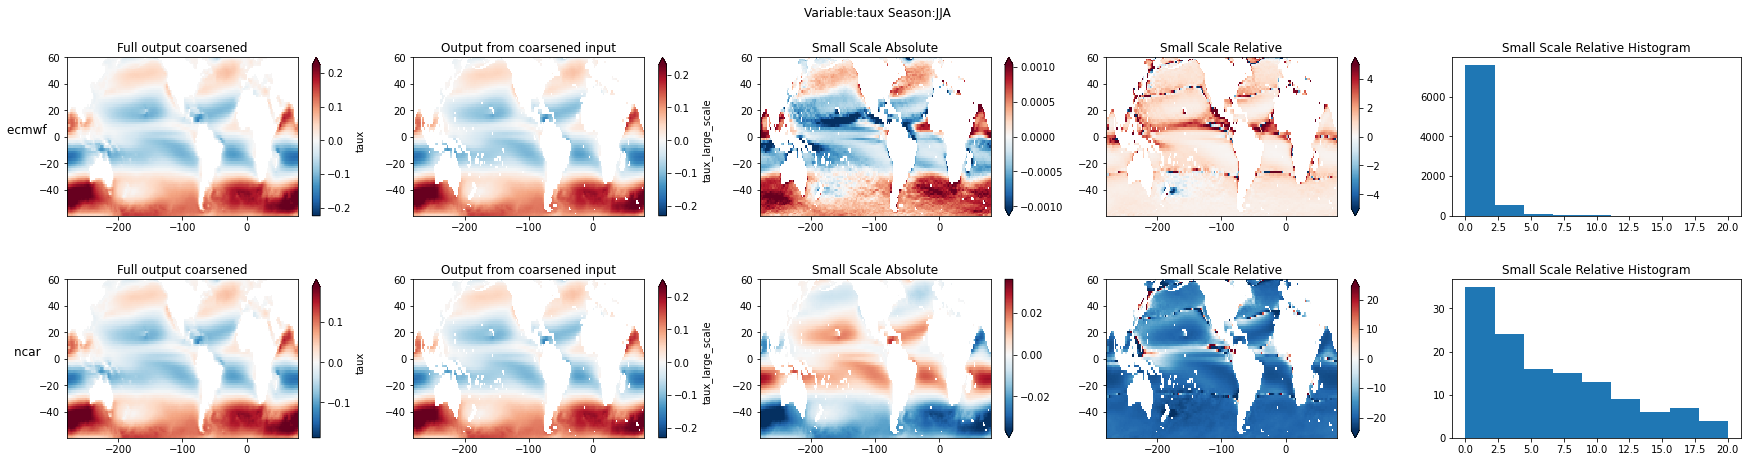

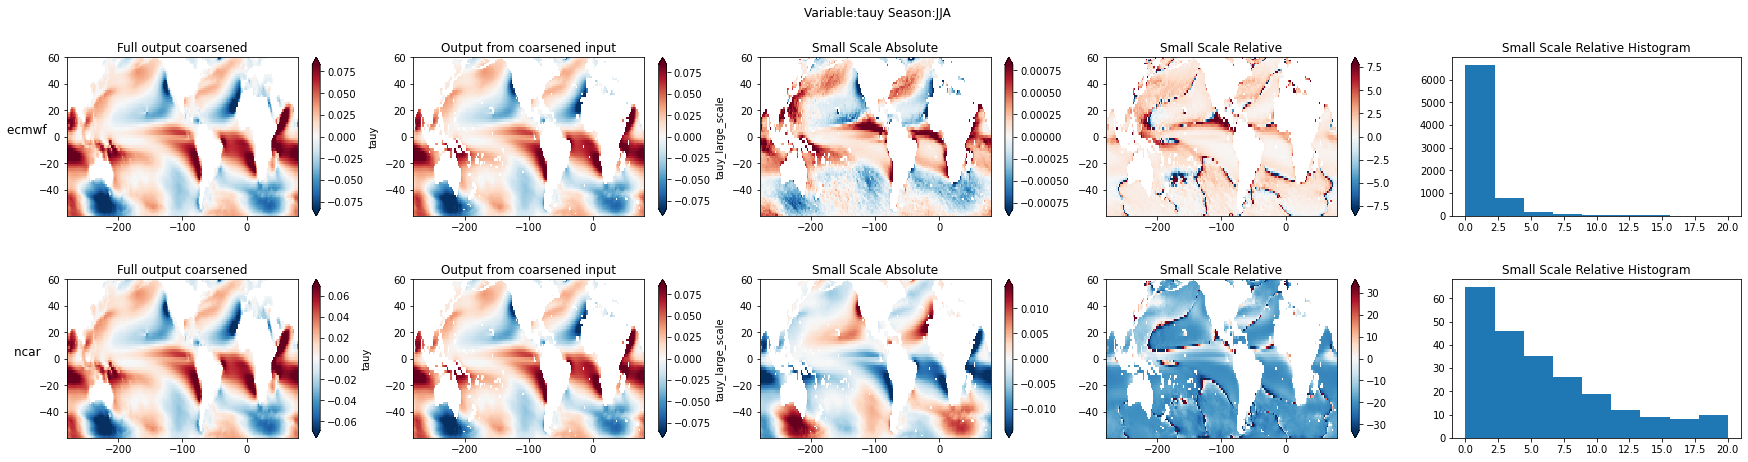

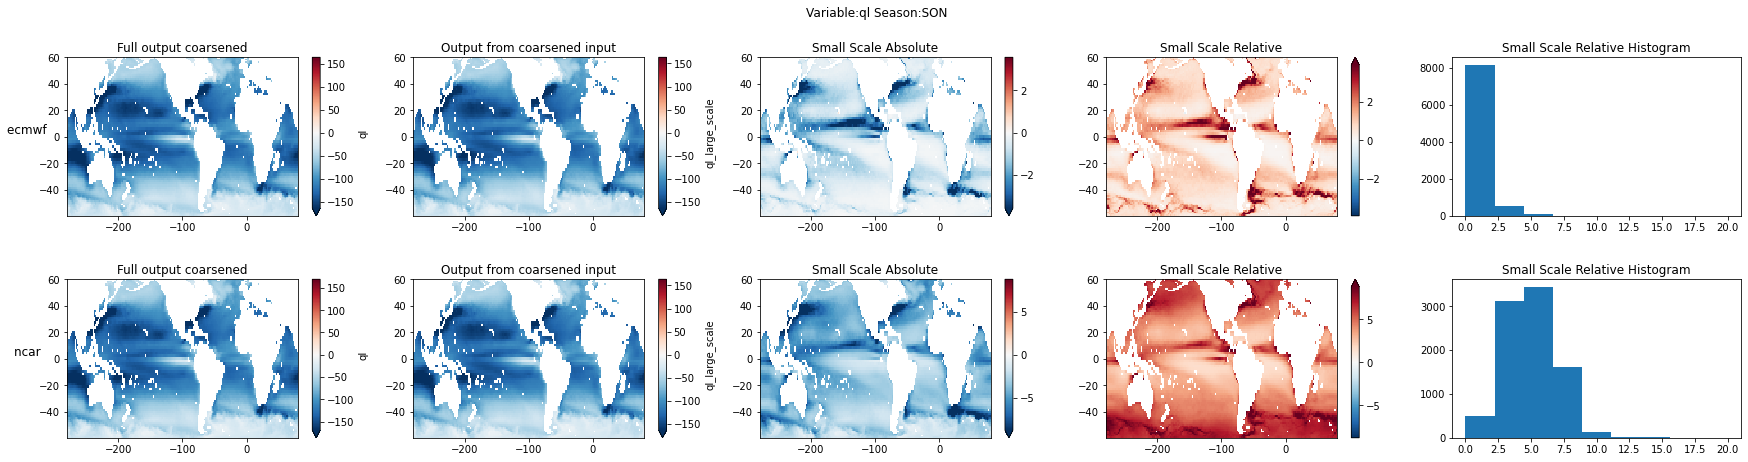

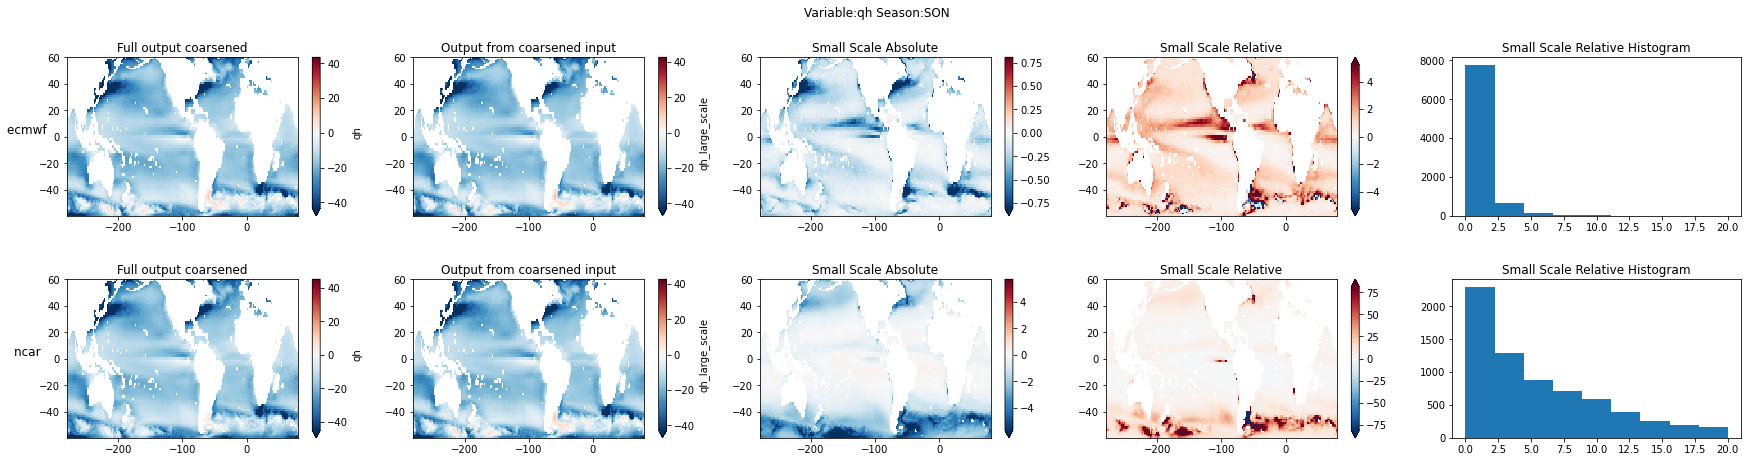

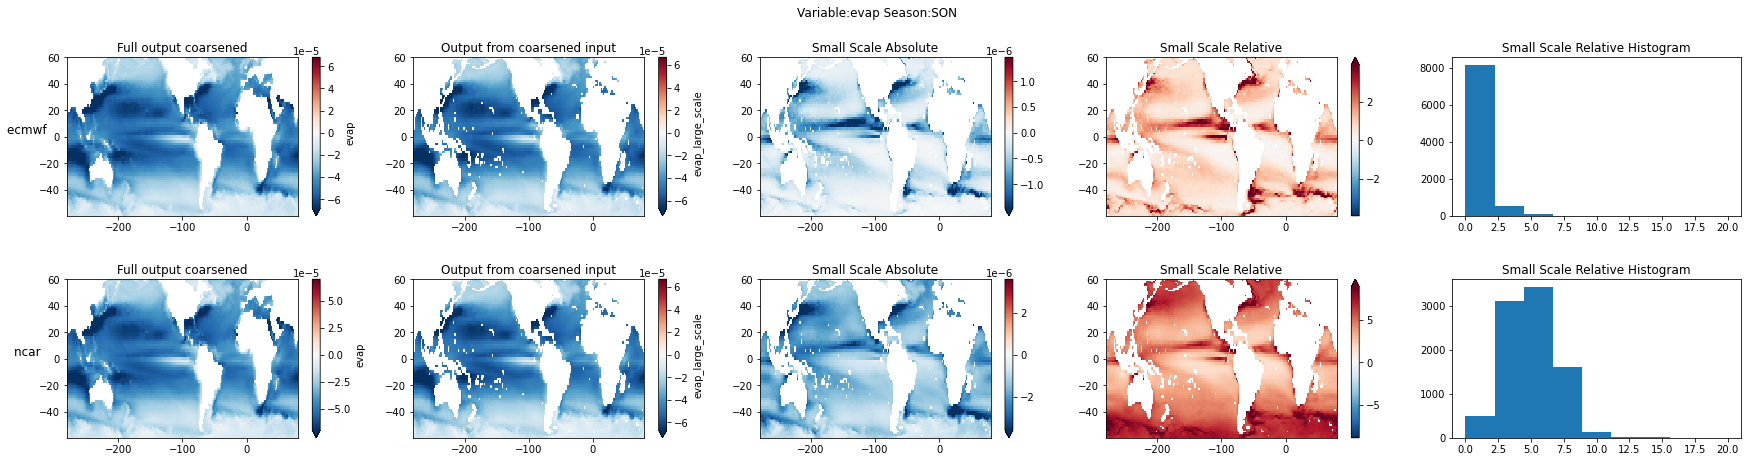

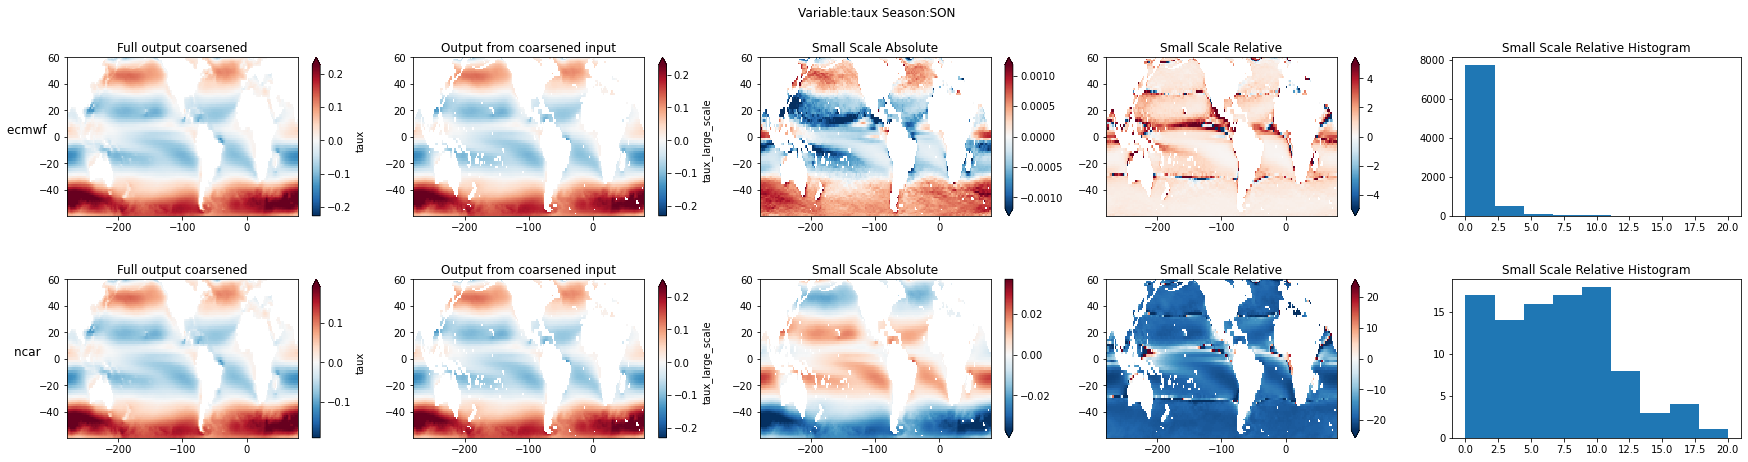

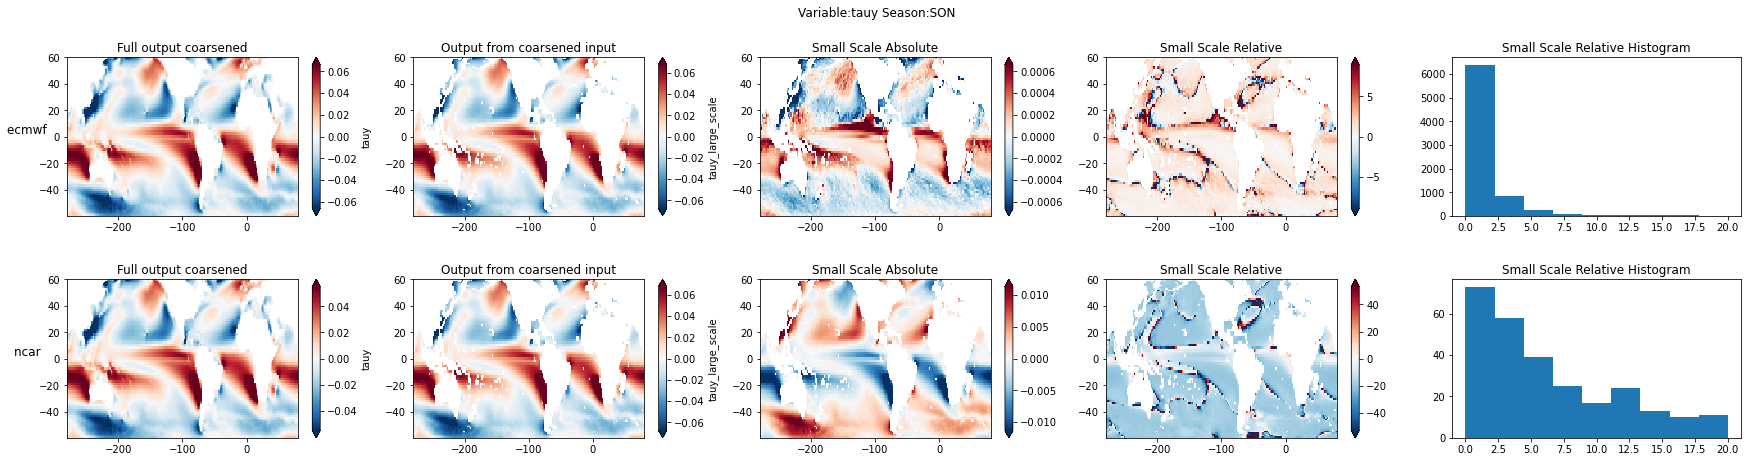

In [90]:
import ipywidgets as ipw
import hvplot.xarray
import panel.widgets as pnw

season = pnw.Select(name='Select', options=['DJF','MAM','JJA','SON'])

plot_kwargs = {'y':'yt_ocean', 'robust':True, 'center':0}
nx = 5
ny = len(algos)
# season = 'DJF'
for season in ['DJF','MAM','JJA','SON']:
    for var in ['ql', 'qh', 'evap', 'taux', 'tauy']:
        fig, axarr = plt.subplots(ny, nx, figsize=[6*nx,3.5*ny])
        for ai,algo in enumerate(algos):
            ds_algo = ds_seasonal.sel(algo=algo, season=season)

            full = ds_algo[var]
            large_scale = ds_algo[var+'_large_scale']
            small_scale = full-large_scale
            small_scale_relative = (small_scale/full*100)

            # Full output
            ax = axarr[ai, 0]
            full.plot(ax=ax, **plot_kwargs)
            ax.set_title('Full output coarsened')

            # Large Scale Part
            ax = axarr[ai, 1]
            large_scale.plot(ax=ax, **plot_kwargs)
            ax.set_title('Output from coarsened input')

            # Small Scale Part
            ax = axarr[ai, 2]
            small_scale.plot(ax=ax, **plot_kwargs)
            ax.set_title('Small Scale Absolute')

            # Small scale relative to full
            ax = axarr[ai, 3]
            small_scale_relative.plot(ax=ax, **plot_kwargs)
            ax.set_title('Small Scale Relative')

            # Histogram of small scale relative
            ax = axarr[ai, 4]
            small_scale_relative.plot.hist(ax=ax,bins=np.linspace(0,20,10))
            ax.set_title('Small Scale Relative Histogram')
            
            # remove all x/y labels
            for ax in axarr.flat:
                ax.set_xlabel('')
                
            for ax in axarr[:,1:].flat:
                ax.set_ylabel('')
            
            # exploit left ylabels for algo annotation
            axarr[ai,0].set_ylabel(f"{algo}    ",rotation=0, size='large')

        fig.subplots_adjust(hspace=0.4)
        fig.suptitle(f"Variable:{var} Season:{season}")